<a href="https://colab.research.google.com/github/NatanRod99/Analise-De-Credito/blob/main/Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
credit = pd.read_csv("/content/dataset_31_credit-g.xls")

In [ ]:
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
credit.columns.values

array(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age',
       'other_payment_plans', 'housing', 'existing_credits', 'job',
       'num_dependents', 'own_telephone', 'foreign_worker', 'class'],
      dtype=object)

In [ ]:
credit.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
credit.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

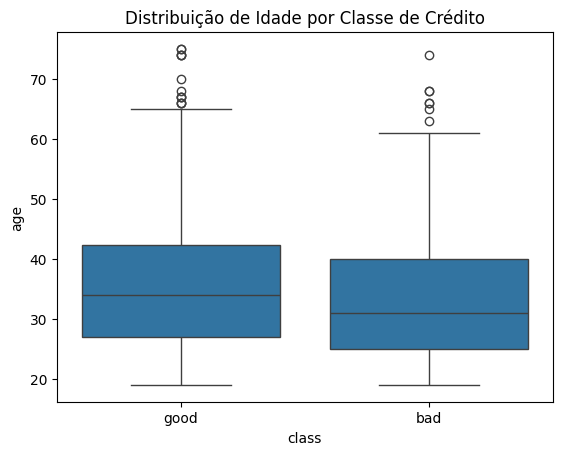

In [ ]:
sns.boxplot(x='class', y='age', data=credit)
plt.title('Distribuição de Idade por Classe de Crédito')
plt.show()

In [ ]:
import plotly.express as px

fig = px.box(credit, x='class', y='age', title='Distribuição de Idade por Classe de Crédito')
fig.show()

In [ ]:
num_registros = credit.shape[0]
print(f"O dataset possui {num_registros} registros.")

O dataset possui 1000 registros.


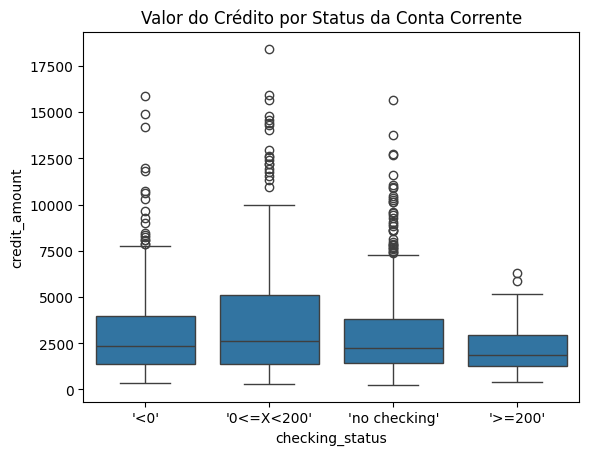

In [ ]:
# Boxplot de credit_amount por checking_status
sns.boxplot(x='checking_status', y='credit_amount', data=credit)
plt.title('Valor do Crédito por Status da Conta Corrente')
plt.show()

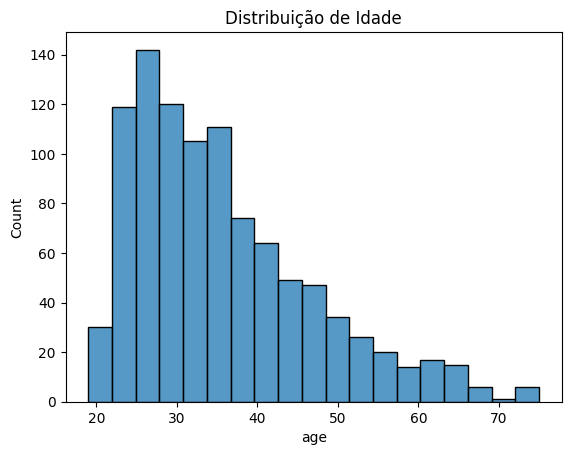

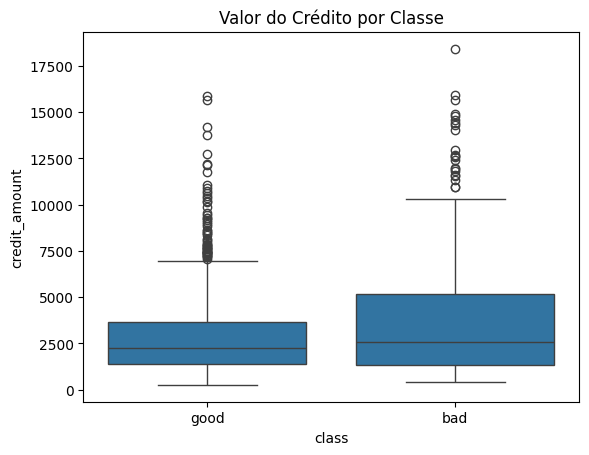

In [ ]:
sns.histplot(credit['age'])
plt.title('Distribuição de Idade')
plt.show()

sns.boxplot(x='class', y='credit_amount', data=credit)
plt.title('Valor do Crédito por Classe')
plt.show()

In [ ]:
# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'X' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Criar e treinar o modelo (exemplo com Regressão Logística)
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print('Acurácia:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# ... (código anterior para carregar e pré-processar os dados)

# Separar features (X) e target (y)
X = credit.drop('class', axis=1)  # Features (todas as colunas, exceto 'class')
y = credit['class']  # Target (a coluna 'class')

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... (código posterior para padronizar as features e treinar o modelo)


In [ ]:
# Codificar as variáveis categóricas com OHE
X = pd.get_dummies(X, columns=['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker'])



In [ ]:
print(credit.columns)


Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [ ]:
# Separar features (X) e target (y)
X = credit.drop('class', axis=1)  # Features (todas as colunas, exceto 'class')
y = credit['class']  # Target (a coluna 'class')

In [ ]:
# Lista das colunas categóricas (todas as colunas, exceto as numéricas 'duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age' e 'existing_credits')
categorical_columns = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']

In [ ]:
# Codificar as variáveis categóricas com One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Dividir em conjunto de treino e teste (agora com X_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Padronizar as features (opcional, mas recomendado para modelos lineares)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Criar o modelo de Regressão Logística
model = LogisticRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.80


In [ ]:
# Imprimir relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.69      0.59      0.64        59
        good       0.84      0.89      0.86       141

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.79      0.80      0.80       200



In [ ]:
# Exibir a matriz de confusão
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[ 35  24]
 [ 16 125]]


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Criar e treinar o modelo com os dados balanceados
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
# Fazer previsões
y_pred = model.predict(X_test)

In [ ]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))

Acurácia do modelo: 0.75
              precision    recall  f1-score   support

         bad       0.56      0.75      0.64        59
        good       0.88      0.75      0.81       141

    accuracy                           0.75       200
   macro avg       0.72      0.75      0.72       200
weighted avg       0.78      0.75      0.76       200

Matriz de Confusão:
[[ 44  15]
 [ 35 106]]


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# Calcular a AUC-ROC
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva
auc_roc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc_roc:.2f}')

AUC-ROC: 0.81


In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Criar um objeto LabelEncoder
le = LabelEncoder()

# Codificar os rótulos de y_train e y_test
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Calcular a curva ROC e a AUC-ROC (usando y_test_encoded)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_proba)
auc_roc = roc_auc_score(y_test_encoded, y_proba)

In [ ]:
# Criar um dicionário para mapear os rótulos
label_map = {'bad': 0, 'good': 1}

# Codificar os rótulos de y_train e y_test
y_train_encoded = y_train.map(label_map)
y_test_encoded = y_test.map(label_map)

# Calcular a curva ROC e a AUC-ROC (usando y_test_encoded)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_proba)
auc_roc = roc_auc_score(y_test_encoded, y_proba)


In [ ]:
# Calcular a curva ROC e a AUC-ROC especificando o rótulo positivo
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label='good')
auc_roc = roc_auc_score(y_test, y_proba)

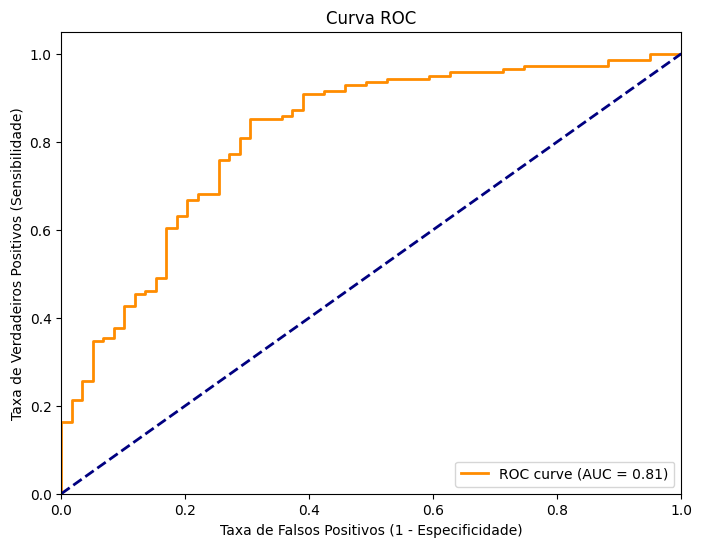

In [ ]:
import matplotlib.pyplot as plt

# Plotar a curva ROC
plt.figure(figsize=(8, 6))  # Ajuste o tamanho da figura se desejar
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha de referência (classificador aleatório)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
